In [16]:
import gym
import random
import tensorflow as tf
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import keras
import cv2
from time import gmtime, strftime
from Agent import *
%matplotlib inline

In [17]:
env = gym.make('Enduro-v0')
env.reset()
env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

State shape:  (210, 160, 3)
Number of actions:  9


In [19]:
actions = env.action_space.n
agent = QAgent(actions)

dimension: 3136
dimension: 3136
Could not find old network weights


'The raw frames are preprocessed by first converting their RGB representation\nto gray-scale and down-sampling it to a 110×84 image.'

Before processing: (210, 160, 3)


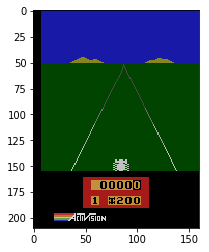

After processing: (84, 84, 1)


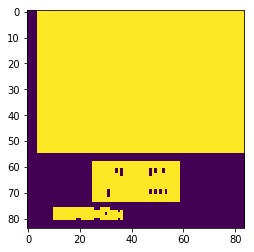

In [22]:
def preprocess(observation):
    observation = cv2.cvtColor(cv2.resize(observation, (84, 110)), cv2.COLOR_BGR2GRAY)
    #the first 26 rows contain only the score, we can ignore them
    observation = observation[26:110,:]
    #ret,thresh1 = cv.threshold(img,lower,upper,cv.THRESH_BINARY) return whitr if < lower, black > upper 
    ret, observation = cv2.threshold(observation,1,255,cv2.THRESH_BINARY)
    return np.reshape(observation,(84,84,1))


action0 = 0  # do nothing
env.reset()
observation0, reward0, terminal, info = env.step(action0)
print("Before processing: " + str(np.array(observation0).shape))
plt.imshow(np.array(observation0))
plt.show()
observation0 = preprocess(observation0)
print("After processing: " + str(np.array(observation0).shape))
plt.imshow(np.array(np.squeeze(observation0)))
plt.show()

In [24]:
agent.setInitState(observation0)
agent.currentState = np.squeeze(agent.currentState)

In [ ]:
while True:
    action = agent.getAction()
    actionmax = np.argmax(np.array(action))
    
    nextObservation,reward,terminal, info = env.step(actionmax)
    
    if terminal:
        nextObservation = env.reset()
    nextObservation = preprocess(nextObservation)
    agent.setPerception(nextObservation,action,reward,terminal)

TIMESTEP 0 / STATE observe / EPSILON 1.0
TIMESTEP 10000 / STATE observe / EPSILON 1.0
TIMESTEP 20000 / STATE observe / EPSILON 1.0
TIMESTEP 30000 / STATE observe / EPSILON 1.0


Before processing: (210, 160, 3)


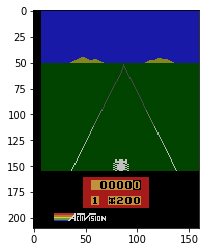

After processing: (84, 84, 1)


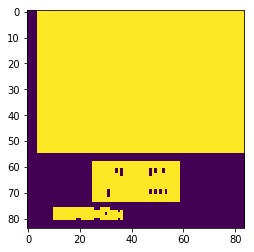